`
Date:       03-03-2021
Params:      R0.9-0.98B13ATP2000MD2000S77T5.0
About:       Actin conformation 
Version:     v11n
Data source: /media/nitta/HDCZ-UT/NITTA-LAB HD3/Sam/V11n/dt1.0s5/SEED77MD3000
By:          Sam Macharia
`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import glob
import dask.dataframe as dd
plt.style.use('ggplot')
cm = 1/2.54

%matplotlib inline

In [2]:
t = 5 #sec
beads = 13
ts = 0.01

# int(t/ts)+1 = total number of outputs

In [15]:
Filament_070 = glob.glob('data/S77/R070/Filament_t5S77R0.7Ts**.csv'); Filament_070 = sorted(Filament_070, key=lambda x:x [-8:])
MotorSpecie1_070 = glob.glob('data/S77/R070/MotorSpecie1_t5S77R0.7Ts**.csv'); MotorSpecie1_070 = sorted(MotorSpecie1_070, key=lambda x:x [-8:])
MotorSpecie2_070 = glob.glob('data/S77/R070/MotorSpecie2_t5S77R0.7Ts**.csv'); MotorSpecie2_070 = sorted(MotorSpecie2_070, key=lambda x:x [-8:])

Filament_090 = glob.glob('data/S77/R090/Filament_t5S77R0.9Ts**.csv'); Filament_090 = sorted(Filament_090, key=lambda x:x [-8:])
MotorSpecie1_090 = glob.glob('data/S77/R090/MotorSpecie1_t5S77R0.9Ts**.csv'); MotorSpecie1_090 = sorted(MotorSpecie1_090, key=lambda x:x [-8:])
MotorSpecie2_090 = glob.glob('data/S77/R090/MotorSpecie2_t5S77R0.9Ts**.csv'); MotorSpecie2_090 = sorted(MotorSpecie2_090, key=lambda x:x [-8:])
Specie1_090 = glob.glob('data/S77/R090/Specie1_t5S77R0.9Ts**.csv'); Specie1_090 = sorted(Specie1_090, key=lambda x:x [-8:])
Specie2_090 = glob.glob('data/S77/R090/Specie2_t5S77R0.9Ts**.csv'); Specie2_090 = sorted(Specie2_090, key=lambda x:x [-8:])

Filament_092 = glob.glob('data/S77/R092/Filament_t5S77R0.92Ts**.csv'); Filament_092 = sorted(Filament_092, key=lambda x:x [-8:])
MotorSpecie1_092 = glob.glob('data/S77/R092/MotorSpecie1_t5S77R0.92Ts**.csv'); MotorSpecie1_092 = sorted(MotorSpecie1_092, key=lambda x:x [-8:])
MotorSpecie2_092 = glob.glob('data/S77/R092/MotorSpecie2_t5S77R0.92Ts**.csv'); MotorSpecie2_092 = sorted(MotorSpecie2_092, key=lambda x:x [-8:])

Filament_098 = glob.glob('data/S77/R098/Filament_t5S77R0.98Ts**.csv'); Filament_098 = sorted(Filament_098, key=lambda x:x [-8:])
MotorSpecie1_098 = glob.glob('data/S77/R098/MotorSpecie1_t5S77R0.98Ts**.csv'); MotorSpecie1_098 = sorted(MotorSpecie1_098, key=lambda x:x [-8:])
MotorSpecie2_098 = glob.glob('data/S77/R098/MotorSpecie2_t5S77R0.98Ts**.csv'); MotorSpecie2_098 = sorted(MotorSpecie2_098, key=lambda x:x [-8:])

Filament_100 = glob.glob('data/S77/R100/Filament_t5S77R1.0Ts**.csv'); Filament_100 = sorted(Filament_100, key=lambda x:x [-8:])
MotorSpecie1_100 = glob.glob('data/S77/R100/MotorSpecie1_t5S77R1.0Ts**.csv'); MotorSpecie1_100 = sorted(MotorSpecie1_100, key=lambda x:x [-8:])
#MotorSpecie2_100 = glob.glob('data/S77/R100/MotorSpecie2_t5S77R1.0Ts**.csv'); MotorSpecie2_100 = sorted(MotorSpecie2_100, key=lambda x:x [-8:])

In [4]:
# idx = []
# c = 0
# for i in range(int(t/ts)+1):
#     for i in range(beads):
#         idx.append(c)
#     c+=1
# idx = pd.DataFrame(idx)

In [16]:
f070 = dd.read_csv(Filament_070,names=['x','y','z'])#, skiprows=1) # don't skiprows -- let it import as object, the better
ms1_070 = dd.read_csv(MotorSpecie1_070,names=['x','y','z'])
ms2_070 = dd.read_csv(MotorSpecie2_070,names=['x','y','z'])

f090 = dd.read_csv(Filament_090,names=['x','y','z'])
ms1_090 = dd.read_csv(MotorSpecie1_090,names=['x','y','z'])
ms2_090 = dd.read_csv(MotorSpecie2_090,names=['x','y','z'])
m1_090 = dd.read_csv(Specie1_090,names=['x','y','z'])
m2_090 = dd.read_csv(Specie2_090,names=['x','y','z'])

f092 = dd.read_csv(Filament_092,names=['x','y','z'])
ms1_092 = dd.read_csv(MotorSpecie1_092,names=['x','y','z'])
ms2_092 = dd.read_csv(MotorSpecie2_092,names=['x','y','z'])

f098 = dd.read_csv(Filament_098,names=['x','y','z'])
ms1_098 = dd.read_csv(MotorSpecie1_098,names=['x','y','z'])
ms2_098 = dd.read_csv(MotorSpecie2_098,names=['x','y','z'])

f100 = dd.read_csv(Filament_100,names=['x','y','z'])
ms1_100 = dd.read_csv(MotorSpecie1_100,names=['x','y','z'])
#ms2_100 = dd.read_csv(MotorSpecie2_100,names=['x','y','z'])

In [6]:
def pt (dta,idx,xy):
    '''
    Get the dataframe from the dask partition
    Change from dask to pandas (.compute())
    Discard the first row (unwanted from original data but was helpful to force read_csv as object)
    Change data type from object to float
    Pick point x or y
    '''
    dta = dta.get_partition(idx).compute()
    dta = dta[1:]
    dta = dta.astype(float)
    dta = dta[xy]
    return dta

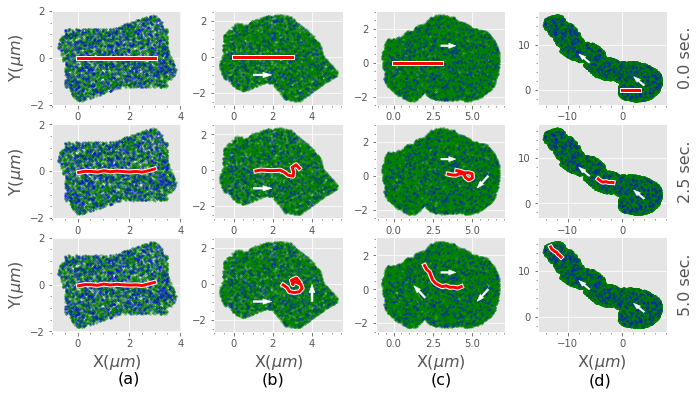

In [89]:
plt.figure(figsize=(28*cm,15*cm))
plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(hspace=0.2)
#plt.axes().set_aspect('equal')

jmp1 = 5; jmp2 = 10; jmp1x=10; jmp2x=20
fnt = 16
alp = 0.3; alp2 = 0.4

plt.subplot(3,4,1)
fts = 0; ts = 500

plt.scatter(pt(ms1_070,ts,'x')[0::jmp1],pt(ms1_070,ts,'y')[0::jmp1] , marker='o', facecolor='green', s=3, color='green', alpha=alp2,rasterized=True)
plt.scatter(pt(ms2_070,ts,'x')[0::jmp2],pt(ms2_070,ts,'y')[0::jmp2] , marker='o', facecolor='blue', s=3, color='blue', alpha=alp2,rasterized=True)
plt.plot(pt(f070,fts,'x'),pt(f070,fts,'y'), marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])
plt.minorticks_on()
plt.ylabel('Y($\mu m$)', fontsize=fnt)
#======================================================
plt.subplot(3,4,5)
fts = 250; ts = 500
plt.scatter(pt(ms1_070,ts,'x')[0::jmp1],pt(ms1_070,ts,'y')[0::jmp1] , marker='o', facecolor='green', s=3, color='green', alpha=alp2,rasterized=True)
plt.scatter(pt(ms2_070,ts,'x')[0::jmp2],pt(ms2_070,ts,'y')[0::jmp2] , marker='o', facecolor='blue', s=3, color='blue', alpha=alp2,rasterized=True)
plt.plot(pt(f070,fts,'x'),pt(f070,fts,'y'), marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])
plt.minorticks_on()
plt.ylabel('Y($\mu m$)', fontsize=fnt)
#========================================================
plt.subplot(3,4,9)
fts = 500; ts = 500
plt.scatter(pt(ms1_070,ts,'x')[0::jmp1],pt(ms1_070,ts,'y')[0::jmp1] , marker='o', facecolor='green', s=3, color='green', alpha=alp2,rasterized=True)
plt.scatter(pt(ms2_070,ts,'x')[0::jmp2],pt(ms2_070,ts,'y')[0::jmp2] , marker='o', facecolor='blue', s=3, color='blue', alpha=alp2,rasterized=True)
plt.plot(pt(f070,fts,'x'),pt(f070,fts,'y'), marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])
plt.minorticks_on()
plt.xlabel('X($\mu m$)', fontsize=fnt)
plt.ylabel('Y($\mu m$)', fontsize=fnt)
plt.text(2,-4.2,'(a)', ha='center', fontsize= 16)
#==========================================================================
#==========================================================================
plt.subplot(3,4,2)
fts = 0; ts = 500
plt.scatter(pt(ms1_090,ts,'x')[0::jmp1],pt(ms1_090,ts,'y')[0::jmp1] , marker='o', facecolor='green', s=3, color='green', alpha=alp,rasterized=True)
plt.scatter(pt(ms2_090,ts,'x')[0::jmp2],pt(ms2_090,ts,'y')[0::jmp2] , marker='o', facecolor='blue', s=3, color='blue', alpha=alp,rasterized=True)
plt.plot(pt(f090,fts,'x'),pt(f090,fts,'y'), marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])
plt.minorticks_on()
plt.arrow(1,-1,0.5,0,width=0.1, color='white')
#plt.arrow(4,-1,0,0.5,width=0.1, color='white')

plt.xlabel('(a) 0.0 sec.', fontsize=fnt)
#======================================================
plt.subplot(3,4,6)
fts = 250; ts = 500
plt.scatter(pt(ms1_090,ts,'x')[0::jmp1],pt(ms1_090,ts,'y')[0::jmp1] , marker='o', facecolor='green', s=3, color='green', alpha=alp,rasterized=True)
plt.scatter(pt(ms2_090,ts,'x')[0::jmp2],pt(ms2_090,ts,'y')[0::jmp2] , marker='o', facecolor='blue', s=3, color='blue', alpha=alp,rasterized=True)
plt.plot(pt(f090,fts,'x'),pt(f090,fts,'y'), marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])
plt.minorticks_on()
plt.arrow(1,-1,0.5,0,width=0.1, color='white')
#plt.arrow(4,-1,0,0.5,width=0.1, color='white')

plt.xlabel('(b) 2.5 sec.', fontsize=fnt)
#========================================================
plt.subplot(3,4,10)
fts = 500; ts = 500
plt.scatter(pt(ms1_090,ts,'x')[0::jmp1],pt(ms1_090,ts,'y')[0::jmp1] , marker='o', facecolor='green', s=3, color='green', alpha=alp,rasterized=True)
plt.scatter(pt(ms2_090,ts,'x')[0::jmp2],pt(ms2_090,ts,'y')[0::jmp2] , marker='o', facecolor='blue', s=3, color='blue', alpha=alp,rasterized=True)
plt.plot(pt(f090,fts,'x'),pt(f090,fts,'y'), marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

plt.arrow(1,-1,0.5,0,width=0.1, color='white')
plt.arrow(4,-1,0,0.5,width=0.1, color='white')
plt.minorticks_on()
plt.xlabel('X($\mu m$)', fontsize=fnt)
plt.text(2,-5.6,'(b)', ha='center', fontsize= 16)
#==========================================================================
#==========================================================================
plt.subplot(3,4,3)
fts = 0; ts = 500
plt.scatter(pt(ms1_092,ts,'x')[0::jmp1],pt(ms1_092,ts,'y')[0::jmp1] , marker='o', facecolor='green', s=3, color='green', alpha=alp,rasterized=True)
plt.scatter(pt(ms2_092,ts,'x')[0::jmp2],pt(ms2_092,ts,'y')[0::jmp2] , marker='o', facecolor='blue', s=3, color='blue', alpha=alp,rasterized=True)
plt.plot(pt(f092,fts,'x'),pt(f092,fts,'y'), marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])
plt.minorticks_on()
plt.arrow(3,1,0.5,0,width=0.1, color='white')
#plt.arrow(6,0,-0.4,-0.4,width=0.1, color='white')
#plt.arrow(2,-0.5,-0.4,0.4,width=0.1, color='white')
#======================================================
plt.subplot(3,4,7)
fts = 250; ts = 500
plt.scatter(pt(ms1_092,ts,'x')[0::jmp1],pt(ms1_092,ts,'y')[0::jmp1] , marker='o', facecolor='green', s=3, color='green', alpha=alp,rasterized=True)
plt.scatter(pt(ms2_092,ts,'x')[0::jmp2],pt(ms2_092,ts,'y')[0::jmp2] , marker='o', facecolor='blue', s=3, color='blue', alpha=alp,rasterized=True)
plt.plot(pt(f092,fts,'x'),pt(f092,fts,'y'), marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])
plt.minorticks_on()
plt.arrow(3,1,0.5,0,width=0.1, color='white')
plt.arrow(6,0,-0.4,-0.4,width=0.1, color='white')
#plt.arrow(2,-0.5,-0.4,0.4,width=0.1, color='white')
#========================================================
plt.subplot(3,4,11)
fts = 500; ts = 500
plt.scatter(pt(ms1_092,ts,'x')[0::jmp1],pt(ms1_092,ts,'y')[0::jmp1] , marker='o', facecolor='green', s=3, color='green', alpha=alp,rasterized=True)
plt.scatter(pt(ms2_092,ts,'x')[0::jmp2],pt(ms2_092,ts,'y')[0::jmp2] , marker='o', facecolor='blue', s=3, color='blue', alpha=alp,rasterized=True)
plt.plot(pt(f092,fts,'x'),pt(f092,fts,'y'), marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

plt.arrow(3,1,0.5,0,width=0.1, color='white')
plt.arrow(6,0,-0.4,-0.4,width=0.1, color='white')
plt.arrow(2,-0.5,-0.4,0.4,width=0.1, color='white')
plt.minorticks_on()
plt.xlabel('X($\mu m$)', fontsize=fnt)
plt.text(3,-5.6,'(c)', ha='center', fontsize= 16)
#==========================================================================
#==========================================================================
plt.subplot(3,4,4)
fts = 0; ts = 500
for ts0 in range(0,501,50):
    plt.scatter(pt(ms1_098,ts0,'x')[0::jmp1],pt(ms1_098,ts0,'y')[0::jmp1] , marker='o', facecolor='green', s=3, color='green', alpha=alp,rasterized=True)
    plt.scatter(pt(ms2_098,ts0,'x')[0::jmp2],pt(ms2_098,ts0,'y')[0::jmp2] , marker='o', facecolor='blue', s=3, color='blue', alpha=alp,rasterized=True)

plt.plot(pt(f098,fts,'x'),pt(f098,fts,'y'), marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])
plt.minorticks_on()
plt.arrow(-6,6,-1,1,width=0.3, color='white')
plt.arrow(4,1,-1,1,width=0.3, color='white')
plt.ylabel('0.0 sec.', labelpad=-175, fontsize=fnt)
#======================================================
plt.subplot(3,4,8)
fts = 250; ts = 500
for ts0 in range(0,501,50):
    plt.scatter(pt(ms1_098,ts0,'x')[0::jmp1],pt(ms1_098,ts0,'y')[0::jmp1] , marker='o', facecolor='green', s=3, color='green', alpha=alp,rasterized=True)
    plt.scatter(pt(ms2_098,ts0,'x')[0::jmp2],pt(ms2_098,ts0,'y')[0::jmp2] , marker='o', facecolor='blue', s=3, color='blue', alpha=alp,rasterized=True)

plt.plot(pt(f098,fts,'x'),pt(f098,fts,'y'), marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])
plt.minorticks_on()
plt.arrow(-6,6,-1,1,width=0.3, color='white')
plt.arrow(4,1,-1,1,width=0.3, color='white')
plt.ylabel('2.5 sec.', labelpad=-175, fontsize=fnt)
#========================================================
plt.subplot(3,4,12)
fts = 500; ts = 500; ts0=10

for ts0 in range(0,501,50):
    plt.scatter(pt(ms1_098,ts0,'x')[0::jmp1],pt(ms1_098,ts0,'y')[0::jmp1] , marker='o', facecolor='green', s=3, color='green', alpha=alp,rasterized=True)
    plt.scatter(pt(ms2_098,ts0,'x')[0::jmp2],pt(ms2_098,ts0,'y')[0::jmp2] , marker='o', facecolor='blue', s=3, color='blue', alpha=alp,rasterized=True)
plt.plot(pt(f098,fts,'x'),pt(f098,fts,'y'), marker=None, markerfacecolor='none', linestyle='-', linewidth=3,\
         color='red', alpha=1, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])

plt.arrow(-6,6,-1,1,width=0.3, color='white')
plt.arrow(4,1,-1,1,width=0.3, color='white')
plt.minorticks_on()
plt.xlabel('X($\mu m$)', fontsize=fnt)
plt.ylabel('5.0 sec.', labelpad=-175, fontsize=fnt)
plt.text(-4,-15,'(d)', ha='center', fontsize= 16)

#==========================================================================

#plt.savefig('fig/afMyosinInteraction_R07_098t55s77.pdf', format='pdf', dpi=100, bbox_inches='tight')
#plt.savefig('fig/afMyosinInteraction_R07_098t55s77.svg', format='svg', dpi=100, bbox_inches='tight')
#plt.savefig('fig/afMyosinInteraction_R07_098t55s77.png', format='png', dpi=500, bbox_inches='tight')
#import subprocess
#subprocess.call('inkscape fig/afMyosinInteraction_R07_098t55s77.svg -M fig/afMyosinInteraction_R07_098t55s77.emf', shell=True)
plt.show()

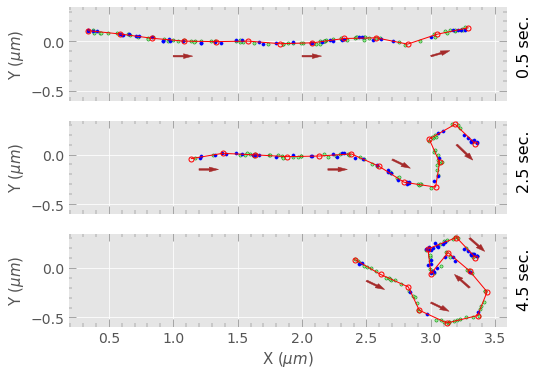

In [241]:
fig, ax = plt.subplots(3,1, figsize=(20*cm,15*cm), sharex=True, sharey=True)

s=10

fts = 50; ts = fts # [0::jmp1] # 
ax[0].scatter(pt(m1_090,ts,'x'),pt(m1_090,ts,'y') , marker='o', facecolor='lightgreen', s=s, color='green', alpha=1)
ax[0].scatter(pt(m2_090,ts,'x'),pt(m2_090,ts,'y') , marker='o', facecolor='blue', s=s, color='blue', alpha=1)
ax[0].plot(pt(f090,fts,'x'),pt(f090,fts,'y'), marker='o', markersize=s/2, markerfacecolor='None', linestyle='-', linewidth=1,\
         color='red', alpha=1) #, path_effects=[pe.Stroke(linewidth=5,foreground='white'),pe.Normal()])
ax[0].arrow(1,-0.15,0.08,-0.0,width=0.016, color='brown')
ax[0].arrow(2,-0.15,0.08,-0.0,width=0.016, color='brown')
ax[0].arrow(3,-0.15,0.08,0.03,width=0.016, color='brown')
#ax[0].set_xticks(np.arange(0,5,1))
#ax[0].set_yticks(np.arange(-0.75,1.0,0.5))
ax[0].minorticks_on()
ax[0].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=8, width=0.5,which='major', labelsize=14)
ax[0].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=4, width=0.4,which='minor', labelsize=14)
ax[0].set_ylabel('Y ($\mu m$)',fontsize=15)
ax[0].text(3.73,-0.33,str(fts/100)+' sec.', rotation=90, ha='center', fontsize=fnt)

#-----------------------------------------
fts = 250; ts = fts # [0::jmp1] # 
ax[1].scatter(pt(m1_090,ts,'x'),pt(m1_090,ts,'y') , marker='o', facecolor='lightgreen', s=s, color='green', alpha=1)
ax[1].scatter(pt(m2_090,ts,'x'),pt(m2_090,ts,'y') , marker='o', facecolor='blue', s=s, color='blue', alpha=1)
ax[1].plot(pt(f090,fts,'x'),pt(f090,fts,'y'), marker='o', markersize=s/2, markerfacecolor='None', linestyle='-', linewidth=1,\
          color='red', alpha=1)
ax[1].arrow(1.2,-0.15,0.08,-0.0,width=0.016, color='brown')
ax[1].arrow(2.2,-0.15,0.08,-0.0,width=0.016, color='brown')
ax[1].arrow(2.7,-0.05,0.08,-0.05,width=0.016, color='brown')
ax[1].arrow(3.2,0.1,0.08,-0.1,width=0.016, color='brown')
#ax[1].set_xticks(np.arange(0,5,1))
#ax[1].set_yticks(np.arange(-0.75,1.0,0.5))
ax[1].minorticks_on()
ax[1].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=8, width=0.5,which='major', labelsize=14)
ax[1].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=4, width=0.4,which='minor', labelsize=14)
ax[1].set_ylabel('Y ($\mu m$)',fontsize=15)
ax[1].text(3.73,-0.35,str(fts/100)+' sec.', rotation=90, ha='center', fontsize=fnt)
#-----------------------------------------
fts = 450; ts = fts # [0::jmp1] # 
ax[2].scatter(pt(m1_090,ts,'x'),pt(m1_090,ts,'y') , marker='o', facecolor='lightgreen', s=s, color='green', alpha=1)
ax[2].scatter(pt(m2_090,ts,'x'),pt(m2_090,ts,'y') , marker='o', facecolor='blue', s=s, color='blue', alpha=1)
ax[2].plot(pt(f090,fts,'x'),pt(f090,fts,'y'), marker='o', markersize=s/2, markerfacecolor='None', linestyle='-', linewidth=1,\
          color='red', alpha=1)

ax[2].arrow(2.5,-0.13,0.08,-0.05,width=0.016, color='brown')
ax[2].arrow(3.0,-0.35,0.08,-0.05,width=0.016, color='brown')
ax[2].arrow(3.3,-0.2,-0.07,0.08,width=0.016, color='brown')
ax[2].arrow(3.3,0.3,0.07,-0.08,width=0.016, color='brown')
#ax[2].set_xticks(np.arange(0,5,1))
#ax[2].set_yticks(np.arange(-0.75,1.0,0.5))
ax[2].minorticks_on()
ax[2].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=8, width=0.5,which='major', labelsize=14)
ax[2].tick_params('both',direction='in',top=True,right=True,bottom=True,left=True,length=4, width=0.4,which='minor', labelsize=14)

ax[2].set_ylabel('Y ($\mu m$)',fontsize=15)
ax[2].set_xlabel('X ($\mu m$)',fontsize=15)
ax[2].text(3.73,-0.4,str(fts/100)+' sec.', rotation=90, ha='center', fontsize=fnt)

#plt.savefig('fig/resistance_R090s77.pdf', format='pdf', dpi=100, bbox_inches='tight')
plt.show()